# 4. Multilayer perceptrons

## 4.1. Multilayer peceptrons

### 4.1.2. Activation Functions

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### ReLU Function

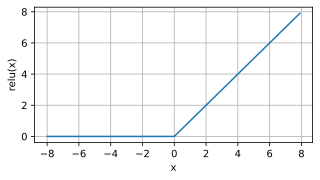

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5,2.5))

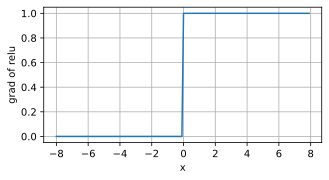

In [3]:
# gradient of relu functions
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5,2.5))

sigmoid

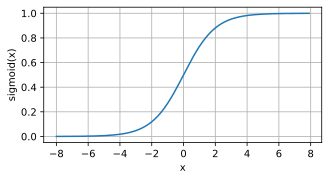

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5,2.5))

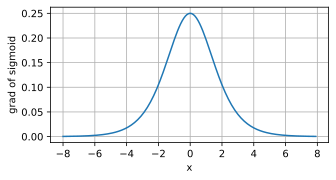

In [5]:
# grad of sigmoid
# sigmoid grad 계산 전에 previous grad는 clear out
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5,2.5))

Tanh Function

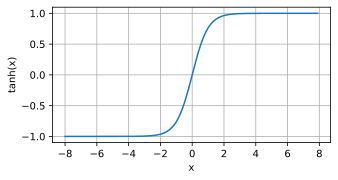

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5,2.5))

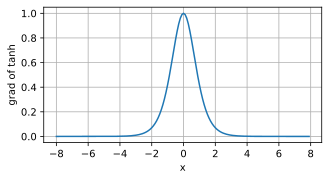

In [7]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5,2.5))

## 4.2. Implementation of Multilayer Perceptrons from Scratch

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1. Initializing Model Parmeters

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

In [11]:
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2. Activation Fucntion

In [12]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3. Model

In [13]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # @: matrix multiplication
    return (H@W2 + b2)

### 4.2.4. Loss Function

In [14]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5. Training

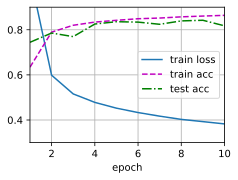

In [15]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter ,test_iter, loss, num_epochs, updater)

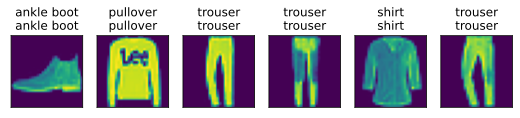

In [16]:
d2l.predict_ch3(net, test_iter)

## 4.3. Concise Implementation of Multilayer Perceptrons

### 4.3.1. Model

In [17]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [18]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

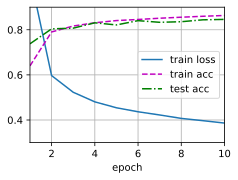

In [19]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.4. Model Selection, Underfitting, and Overfitting

### 4.4.4. Polynomial Regression

In [20]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

#### Generating the Dataset

In [21]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5,1.2,-3.4,5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1,-1))

for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i+1)

labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [22]:
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [23]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.4064],
         [-1.3669]]),
 tensor([[ 1.0000e+00,  4.0642e-01,  8.2590e-02,  1.1189e-02,  1.1368e-03,
           9.2407e-05,  6.2594e-06,  3.6342e-07,  1.8463e-08,  8.3375e-10,
           3.3885e-11,  1.2520e-12,  4.2403e-14,  1.3257e-15,  3.8484e-17,
           1.0427e-18,  2.6486e-20,  6.3322e-22,  1.4297e-23,  3.0583e-25],
         [ 1.0000e+00, -1.3669e+00,  9.3414e-01, -4.2561e-01,  1.4544e-01,
          -3.9758e-02,  9.0573e-03, -1.7686e-03,  3.0217e-04, -4.5891e-05,
           6.2727e-06, -7.7944e-07,  8.8782e-08, -9.3347e-09,  9.1137e-10,
          -8.3047e-11,  7.0946e-12, -5.7043e-13,  4.3316e-14, -3.1161e-15]]),
 tensor([ 5.2798, -2.2092]))

#### Training and Testing the Model

In [24]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2)
    for X,y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [25]:
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]

    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)), batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr = 0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log', xlim=[1,num_epochs], ylim=[1e-3, 1e2], legend=['train', 'test'])

    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    
    print('weight:', net[0].weight.data.numpy())


#### Third-Order Polynomial Function Fitting (Normal)

weight: [[ 4.994028   1.3376311 -3.349503   5.1888556]]


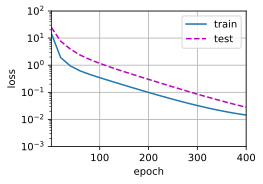

In [26]:
train(poly_features[:n_train,:4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

### Linear Function Fitting (Underfitting)

weight: [[3.8326786 2.5129182]]


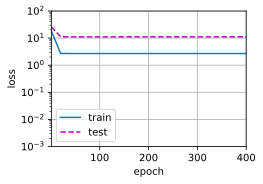

In [27]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])

#### High-Order Polynomial Function Fitting (Overfitting)

weight: [[ 5.012995    1.2238749  -3.3730428   5.3808413  -0.21100332  1.041914
   0.07938608  0.13575822 -0.11508267  0.00586737 -0.06932765  0.11472945
   0.04658055  0.04035902  0.05136102  0.14303915 -0.11265516  0.12411735
  -0.08528427  0.13832319]]


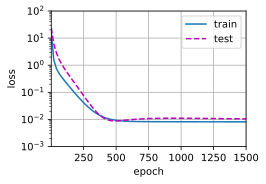

In [29]:
train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)

## 4.5. Weight Decay

### 4.5.2. High-Dimensional Linear Regression

In [30]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 4.5.3. Implementation from Scratch

#### Initializing Model Parameters

In [31]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w,b]

#### Defining $L_2$ Norm Penalty

In [32]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### Defining the Training Loop

In [33]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5,num_epochs], legend=['train', 'test'])

    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                    d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of 2:', torch.norm(w).item())

#### Training without Regularization

L2 norm of 2: 13.664427757263184


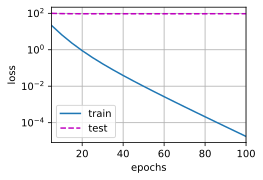

In [35]:
train(lambd = 0)

#### Using Weight Decay

L2 norm of 2: 0.38049858808517456


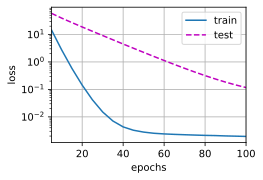

In [36]:
train(lambd=3)

### 4.5.4. Concise Implementation

In [40]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003

    trainer = torch.optim.SGD([
        {'params':net[0].weight, 'weight_decay':wd},
        {'params': net[0].bias}
    ], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5,num_epochs], legend=['train','test'])

    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.mean().backward()
            trainer.step()

        if (epoch + 1) % 5 == 0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    
    print('L2 norm of w: ', net[0].weight.norm().item())


L2 norm of w:  13.702597618103027


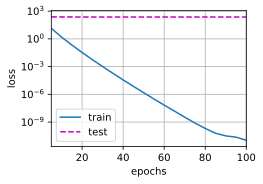

In [41]:
train_concise(0)

L2 norm of w:  0.5017963647842407


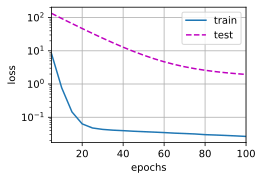

In [42]:
train_concise(3)